In [1]:
from utility.colors import okabe_ito
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import umap

from models.molecule_encoder import MorganFp, RDKitDescriptors

/home/pfichtelmann/Software/anaconda3/envs/odor_strength_code/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
DPI = 600
FONTSIZE = 8
LABELSIZE = 7
LABELPAD = 4
FIGURE_WIDTH = 8.3 / 2.54
FIGURE_WIDTH_LONG = 17.1 / 2.54
S_DOT_GREY = 1
S_DOT_COLOR = 1

colors = [okabe_ito[2], okabe_ito[3], okabe_ito[1], okabe_ito[7]]

Run the notebook dataset_curation.ipynb or python script dataset_curation.py first

In [3]:
df = pd.read_csv('data/df_odor_strength.csv')

## Dimensionality Reduction

### Odor strength data

In [4]:
morgan_fingerprint = MorganFp(count=False, radius=3, fpSize=2048)
morgan_fingerprint_count = MorganFp(count=True, radius=3, fpSize=2048)
morgan_fingerprints = morgan_fingerprint.encode(df['canonical_smiles'].tolist())
morgan_fingerprints_count = morgan_fingerprint_count.encode(df['canonical_smiles'].tolist())
rdkit_descriptors = RDKitDescriptors().encode(df['canonical_smiles'].tolist())
rdkit_descriptors = pd.DataFrame(StandardScaler().fit_transform(rdkit_descriptors), columns=rdkit_descriptors.columns)

In [5]:
# PCA for Morgan Fingerprints (Binary)
pca_morgan = PCA(n_components=2, random_state=42)
morgan_pca = pca_morgan.fit_transform(morgan_fingerprints)

# PCA for Morgan Fingerprints (Count)
pca_morgan_count = PCA(n_components=2, random_state=42)
morgan_count_pca = pca_morgan_count.fit_transform(morgan_fingerprints_count)

# PCA for RDKit Descriptors
pca_rdkit_desc = PCA(n_components=2, random_state=42)
rdkit_pca = pca_rdkit_desc.fit_transform(rdkit_descriptors)

# UMAP for Morgan Fingerprints (Binary)
umap_morgan = umap.UMAP(n_components=2, random_state=42)
morgan_umap = umap_morgan.fit_transform(morgan_fingerprints)

# UMAP for Morgan Fingerprints (Count)
umap_morgan_count = umap.UMAP(n_components=2, random_state=42)
morgan_count_umap = umap_morgan_count.fit_transform(morgan_fingerprints_count)

# UMAP for RDKit Descriptors
umap_rdkit = umap.UMAP(n_components=2, random_state=42)
rdkit_umap = umap_rdkit.fit_transform(rdkit_descriptors)

/home/pfichtelmann/Software/anaconda3/envs/odor_strength_code/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/pfichtelmann/Software/anaconda3/envs/odor_strength_code/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/pfichtelmann/Software/anaconda3/envs/odor_strength_code/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/pfichtelmann/Software/anaconda3/envs/odor_strength_code/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/pfichtelmann/Software/anaconda3/envs/odor_strength_code/lib/python3.

Morgan FP (Binary) - PCA
Morgan FP (Count) - PCA
RDKit Descriptors - PCA
Morgan FP (Binary) - UMAP
Morgan FP (Count) - UMAP
RDKit Descriptors - UMAP


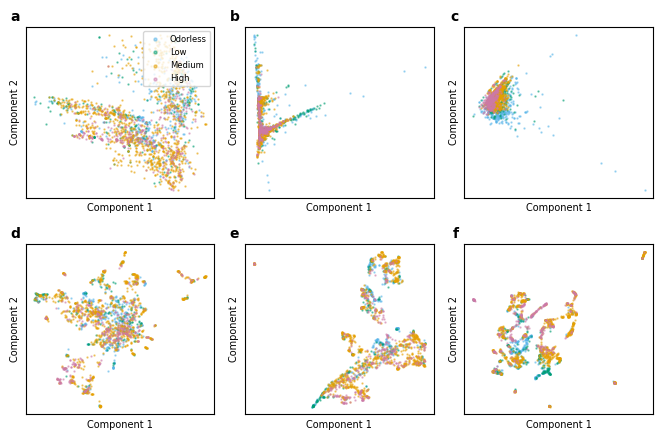

In [6]:
# Create visualization of PCA and UMAP results colored by numerical_strength
fig, axes = plt.subplots(2, 3, figsize=(FIGURE_WIDTH_LONG, FIGURE_WIDTH_LONG * 2/3))

# Define colors for the 4 categories using okabe_ito palette
strength_categories = [0, 1, 2, 3]
category_labels = ['Odorless', 'Low', 'Medium', 'High']

# Define subplot labels
subplot_labels = ['a', 'b', 'c', 'd', 'e', 'f']

# Plotting data with PCA objects for explained variance
plot_data = [
    (morgan_pca, 'Morgan FP (Binary) - PCA', pca_morgan),
    (morgan_count_pca, 'Morgan FP (Count) - PCA', pca_morgan_count),
    (rdkit_pca, 'RDKit Descriptors - PCA', pca_rdkit_desc),
    (morgan_umap, 'Morgan FP (Binary) - UMAP', None),
    (morgan_count_umap, 'Morgan FP (Count) - UMAP', None),
    (rdkit_umap, 'RDKit Descriptors - UMAP', None)
]

for idx, (data, title, pca_obj) in enumerate(plot_data):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    
    # Plot each category with different colors
    for cat_idx, strength in enumerate(strength_categories):
        mask = df['numerical_strength'] == strength
        ax.scatter(data[mask, 0], data[mask, 1], 
                  c=colors[cat_idx], 
                  label=category_labels[cat_idx],
                  alpha=0.5, 
                  s=0.5)
    
    # ax.set_title(title, fontsize=FONTSIZE, pad=LABELPAD)
    print(title)
    
    # Add subplot label in the top right corner
    ax.text(-0.03, 1.1, f'{subplot_labels[idx]}', transform=ax.transAxes, 
            fontsize=FONTSIZE+2, fontweight='bold', ha='right', va='top')
    
    # Add explained variance to axis labels for PCA plots
    # if pca_obj is not None:  # PCA plots
    #     var_ratio = pca_obj.explained_variance_ratio_
    #     ax.set_xlabel(f'PC1 ({var_ratio[0]:.1%})', fontsize=LABELSIZE, labelpad=LABELPAD)
    #     ax.set_ylabel(f'PC2 ({var_ratio[1]:.1%})', fontsize=LABELSIZE, labelpad=LABELPAD)
    # else:  # UMAP plots
    ax.set_xlabel('Component 1', fontsize=LABELSIZE, labelpad=LABELPAD)
    ax.set_ylabel('Component 2', fontsize=LABELSIZE, labelpad=LABELPAD)
    
    ax.tick_params(labelsize=LABELSIZE-1, labelbottom=False, labelleft=False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.tick_params(axis='both', which='both', length=0)
    
    # Add legend only to the first subplot
    if idx == 0:
        ax.legend(fontsize=LABELSIZE-1, loc='upper right', markerscale=3)

plt.tight_layout()
plt.savefig('figures/pca_umap_odor_strength.pdf', dpi=DPI)
plt.show()

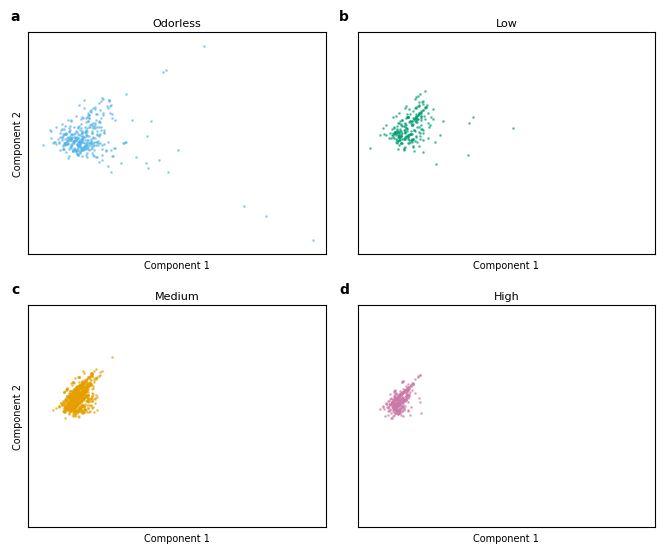

In [7]:
# Create separate plots for each numerical strength category using RDKit Descriptors PCA
fig, axes = plt.subplots(2, 2, figsize=(FIGURE_WIDTH_LONG, FIGURE_WIDTH_LONG / 1.2))

# Define colors for the 4 categories using okabe_ito palette
strength_categories = [0, 1, 2, 3]
category_labels = ['Odorless', 'Low', 'Medium', 'High']

# Define subplot labels for 2x2 grid
subplot_labels_2x2 = ['a', 'b', 'c', 'd']

# Get explained variance ratios for axis labels
var_ratio = pca_rdkit_desc.explained_variance_ratio_

for idx, strength in enumerate(strength_categories):
    row = idx // 2
    col = idx % 2
    ax = axes[row, col]
    
    # Filter data for current strength category
    mask = df['numerical_strength'] == strength
    strength_data = rdkit_pca[mask]
    
    # Plot data points for this strength category
    ax.scatter(strength_data[:, 0], strength_data[:, 1], 
              c=colors[idx], 
              alpha=0.5, 
              s=1)
    
    # Set title with category name and sample count
    sample_count = mask.sum()
    ax.set_title(f'{category_labels[idx]}', fontsize=FONTSIZE, pad=LABELPAD)
    # print(title)
    
    # Add subplot label in the top right corner
    ax.text(-0.03, 1.1, f'{subplot_labels_2x2[idx]}', transform=ax.transAxes, 
            fontsize=FONTSIZE+2, fontweight='bold', ha='right', va='top')
    
    # Add explained variance to axis labels
    ax.set_xlabel(f'Component 1', fontsize=LABELSIZE, labelpad=LABELPAD)
    if col == 0:  # Only add y-label to the left column subplots
        ax.set_ylabel(f'Component 2', fontsize=LABELSIZE, labelpad=LABELPAD)
    
    ax.tick_params(labelsize=LABELSIZE-1, labelbottom=False, labelleft=False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.tick_params(axis='both', which='both', length=0)
    
    # Set consistent axis limits across all subplots
    ax.set_xlim(rdkit_pca[:, 0].min() - 5, rdkit_pca[:, 0].max() + 5)
    ax.set_ylim(rdkit_pca[:, 1].min() - 5, rdkit_pca[:, 1].max() + 5)

plt.tight_layout()
plt.savefig('figures/pca_rdkit_desc_per_odor_strength.pdf', dpi=DPI)
plt.show()

### With odorous molecules background

In [8]:
from data.molecules.smiles_converter import SmilesCanonicalizer

s3_mayhew = pd.read_csv('data/mayhew_2022/pnas.2116576119.sd03.csv')


s3_mayhew['canonical_smiles'] = SmilesCanonicalizer().canonicalize_smiles(s3_mayhew['SMILES'].tolist())

print('Number of probable odorous molecules', (s3_mayhew['transport.ML.odor.probability'] > 0.5).sum())


smiles_gs = df[df['source'] == 'GoodScents']['canonical_smiles'].tolist()
smiles_pubchem = df[df['source'] == 'pubchem']['canonical_smiles'].tolist()


def get_all_morgan_fingerprints(s3, count):
    morgan_fingerprint = MorganFp(count=count, radius=3, fpSize=2048)
    if s3 is not None:
        all_smiles = list(set(s3['canonical_smiles'].tolist() + df['canonical_smiles'].tolist()))
    else:
        all_smiles = list(set(df['canonical_smiles'].tolist()))
    all_fingerprints = morgan_fingerprint.encode(all_smiles)
    return all_fingerprints, all_smiles


def get_all_rdkit_descriptors(s3):
    if s3 is not None:
        all_smiles = list(set(s3['canonical_smiles'].tolist() + df['canonical_smiles'].tolist()))
    else:
        all_smiles = list(set(df['canonical_smiles'].tolist()))
    all_descriptors = RDKitDescriptors().encode(all_smiles)
    all_descriptors = StandardScaler().fit_transform(all_descriptors)
    return all_descriptors, all_smiles

def pca_analysis(s3, only_s3_fit=False, fingerprint_function=get_all_morgan_fingerprints):
    all_fingerprints, all_smiles = fingerprint_function(s3)
    pca = PCA(n_components=2)
    if only_s3_fit:
        pca.fit(np.array(all_fingerprints[[smiles in s3['canonical_smiles'].tolist() for smiles in all_smiles]]))
    else:
        pca.fit(np.array(all_fingerprints))
    x_pca_all = pca.transform(np.array(all_fingerprints))
    x_pca_gs = x_pca_all[[smiles in smiles_gs for smiles in all_smiles]]
    x_pca_pubchem = x_pca_all[[smiles in smiles_pubchem for smiles in all_smiles]]
    x_pca_0 = x_pca_all[[smiles in df[df['numerical_strength'] == 0]['canonical_smiles'].tolist() for smiles in all_smiles]]
    x_pca_1 = x_pca_all[[smiles in df[df['numerical_strength'] == 1]['canonical_smiles'].tolist() for smiles in all_smiles]]
    x_pca_2 = x_pca_all[[smiles in df[df['numerical_strength'] == 2]['canonical_smiles'].tolist() for smiles in all_smiles]]
    x_pca_3 = x_pca_all[[smiles in df[df['numerical_strength'] == 3]['canonical_smiles'].tolist() for smiles in all_smiles]]
    return pca, x_pca_all, x_pca_gs, x_pca_pubchem, x_pca_0, x_pca_1, x_pca_2, x_pca_3, pca.explained_variance_ratio_

def umap_analysis(s3, only_s3_fit=False, fingerprint_function=get_all_morgan_fingerprints):
    all_fingerprints, all_smiles = fingerprint_function(s3)
    u = umap.UMAP(n_components=2)
    if only_s3_fit:
        u.fit(np.array(all_fingerprints[[smiles in s3['canonical_smiles'].tolist() for smiles in all_smiles]]))
    else:
        u.fit(np.array(all_fingerprints))
    x_umap_all = u.transform(np.array(all_fingerprints))
    x_umap_gs = x_umap_all[[smiles in smiles_gs for smiles in all_smiles]]
    x_umap_pubchem = x_umap_all[[smiles in smiles_pubchem for smiles in all_smiles]]
    x_umap_0 = x_umap_all[[smiles in df[df['numerical_strength'] == 0]['canonical_smiles'].tolist() for smiles in all_smiles]]
    x_umap_1 = x_umap_all[[smiles in df[df['numerical_strength'] == 1]['canonical_smiles'].tolist() for smiles in all_smiles]]
    x_umap_2 = x_umap_all[[smiles in df[df['numerical_strength'] == 2]['canonical_smiles'].tolist() for smiles in all_smiles]]
    x_umap_3 = x_umap_all[[smiles in df[df['numerical_strength'] == 3]['canonical_smiles'].tolist() for smiles in all_smiles]]
    return x_umap_all, x_umap_gs, x_umap_pubchem, x_umap_0, x_umap_1, x_umap_2, x_umap_3

# def plot(x_all, x_gs, x_pubchem, save_path=None):
#     fig = plt.figure(figsize=(FIGURE_WIDTH, 2.5))
#     plt.scatter(x_all[:, 0], x_all[:, 1], s=S_DOT_GREY, c='grey', alpha=0.1)
#     plt.scatter(x_gs[:, 0], x_gs[:, 1], s=S_DOT_COLOR, label='Good Scents', c=okabe_ito[1])
#     plt.scatter(x_pubchem[:, 0], x_pubchem[:, 1], s=S_DOT_COLOR, label='PubChem', c=okabe_ito[3])
#     plt.xlabel('Component 1', fontsize=FONTSIZE, labelpad=LABELPAD)
#     plt.ylabel('Component 2', fontsize=FONTSIZE, labelpad=LABELPAD)
#     plt.tick_params(axis='both', labelleft=False, labelbottom=False, length=0)
#     plt.legend(fontsize=LABELSIZE)
#     plt.tight_layout()
#     if save_path is not None:
#         plt.savefig(save_path, dpi=DPI, bbox_inches='tight')

# def plot_strength(x_all, x_0, x_1, x_2, x_3, save_path=None):
#     plt.scatter(x_all[:, 0], x_all[:, 1], s=S_DOT_GREY, c='grey', alpha=0.1)
#     plt.scatter(x_0[:, 0], x_0[:, 1], s=S_DOT_COLOR, label='Odorless', c=okabe_ito[1])
#     plt.scatter(x_1[:, 0], x_1[:, 1], s=S_DOT_COLOR, label='Low', c=okabe_ito[2])
#     plt.scatter(x_2[:, 0], x_2[:, 1], s=S_DOT_COLOR, label='Medium', c=okabe_ito[3])
#     plt.scatter(x_3[:, 0], x_3[:, 1], s=S_DOT_COLOR, label='High', c=okabe_ito[4])
#     plt.xlabel('Component 1', fontsize=FONTSIZE, labelpad=LABELPAD)
#     plt.ylabel('Component 2', fontsize=FONTSIZE, labelpad=LABELPAD)
#     plt.tick_params(axis='both', labelleft=False, labelbottom=False, length=0)
#     plt.legend(fontsize=LABELSIZE)
#     plt.tight_layout()
#     if save_path is not None:
#         plt.savefig(save_path, dpi=DPI, bbox_inches='tight')

Number of probable odorous molecules 52457


In [9]:
# Create 3x2 plot showing PCA and UMAP results for different descriptor types
import numpy as np

# Get PCA and UMAP results for different descriptor types
print("Computing PCA and UMAP for different descriptor types...")

# 1. RDKit Descriptors
print("Processing RDKit Descriptors...")
pca_rdkit, x_pca_all_rdkit, x_pca_gs_rdkit, x_pca_pubchem_rdkit, x_pca_0_rdkit, x_pca_1_rdkit, x_pca_2_rdkit, x_pca_3_rdkit, explained_var_rdkit = pca_analysis(s3_mayhew, fingerprint_function=get_all_rdkit_descriptors)


Computing PCA and UMAP for different descriptor types...
Processing RDKit Descriptors...


In [10]:
x_umap_all_rdkit, x_umap_gs_rdkit, x_umap_pubchem_rdkit, x_umap_0_rdkit, x_umap_1_rdkit, x_umap_2_rdkit, x_umap_3_rdkit = umap_analysis(s3_mayhew, fingerprint_function=get_all_rdkit_descriptors)

# 2. Morgan Fingerprints (Binary, count=False)
print("Processing Morgan Fingerprints (Binary)...")
pca_morgan_bin, x_pca_all_morgan_bin, x_pca_gs_morgan_bin, x_pca_pubchem_morgan_bin, x_pca_0_morgan_bin, x_pca_1_morgan_bin, x_pca_2_morgan_bin, x_pca_3_morgan_bin, explained_var_morgan_bin = pca_analysis(s3_mayhew, fingerprint_function=lambda s3: get_all_morgan_fingerprints(s3, count=False))
x_umap_all_morgan_bin, x_umap_gs_morgan_bin, x_umap_pubchem_morgan_bin, x_umap_0_morgan_bin, x_umap_1_morgan_bin, x_umap_2_morgan_bin, x_umap_3_morgan_bin = umap_analysis(s3_mayhew, fingerprint_function=lambda s3: get_all_morgan_fingerprints(s3, count=False))

# 3. Morgan Fingerprints (Count, count=True)
print("Processing Morgan Fingerprints (Count)...")
pca_morgan_count, x_pca_all_morgan_count, x_pca_gs_morgan_count, x_pca_pubchem_morgan_count, x_pca_0_morgan_count, x_pca_1_morgan_count, x_pca_2_morgan_count, x_pca_3_morgan_count, explained_var_morgan_count = pca_analysis(s3_mayhew, fingerprint_function=lambda s3: get_all_morgan_fingerprints(s3, count=True))
x_umap_all_morgan_count, x_umap_gs_morgan_count, x_umap_pubchem_morgan_count, x_umap_0_morgan_count, x_umap_1_morgan_count, x_umap_2_morgan_count, x_umap_3_morgan_count = umap_analysis(s3_mayhew, fingerprint_function=lambda s3: get_all_morgan_fingerprints(s3, count=True))

print("All computations completed!")

/home/pfichtelmann/Software/anaconda3/envs/odor_strength_code/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/pfichtelmann/Software/anaconda3/envs/odor_strength_code/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/home/pfichtelmann/Software/anaconda3/envs/odor_strength_code/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Processing Morgan Fingerprints (Binary)...


/home/pfichtelmann/Software/anaconda3/envs/odor_strength_code/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/pfichtelmann/Software/anaconda3/envs/odor_strength_code/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Processing Morgan Fingerprints (Count)...


/home/pfichtelmann/Software/anaconda3/envs/odor_strength_code/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/pfichtelmann/Software/anaconda3/envs/odor_strength_code/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


All computations completed!


RDKit Descriptors - PCA
RDKit Descriptors - UMAP
Morgan FP (Binary) - PCA
Morgan FP (Binary) - UMAP
Morgan FP (Count) - PCA
Morgan FP (Count) - UMAP


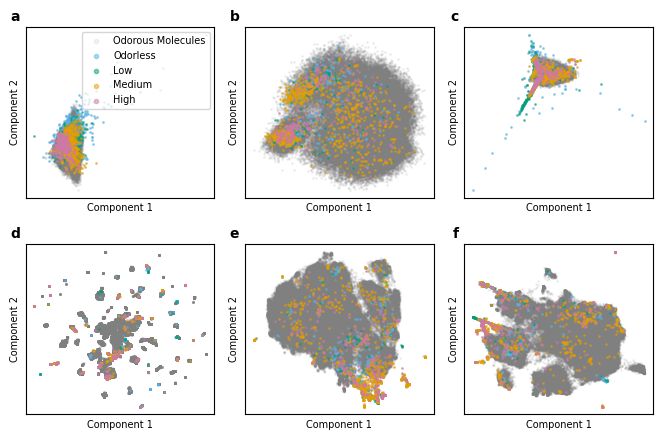

In [11]:
# Create 3x2 subplot using the plot_strength function
fig, axes = plt.subplots(2, 3, figsize=(FIGURE_WIDTH_LONG, FIGURE_WIDTH_LONG * 2/3))

# Define the plot configurations: (data_tuple, title, row, col)
plot_configs = [
    # Row 0: RDKit Descriptors
    ((x_pca_all_rdkit, x_pca_0_rdkit, x_pca_1_rdkit, x_pca_2_rdkit, x_pca_3_rdkit), explained_var_rdkit, 'RDKit Descriptors - PCA', 0, 0),
    ((x_umap_all_rdkit, x_umap_0_rdkit, x_umap_1_rdkit, x_umap_2_rdkit, x_umap_3_rdkit), None, 'RDKit Descriptors - UMAP', 1, 0),
    
    # Row 1: Morgan Fingerprints (Binary)
    ((x_pca_all_morgan_bin, x_pca_0_morgan_bin, x_pca_1_morgan_bin, x_pca_2_morgan_bin, x_pca_3_morgan_bin), explained_var_morgan_bin, 'Morgan FP (Binary) - PCA', 0, 1),
    ((x_umap_all_morgan_bin, x_umap_0_morgan_bin, x_umap_1_morgan_bin, x_umap_2_morgan_bin, x_umap_3_morgan_bin), None, 'Morgan FP (Binary) - UMAP', 1, 1),

    # Row 2: Morgan Fingerprints (Count)
    ((x_pca_all_morgan_count, x_pca_0_morgan_count, x_pca_1_morgan_count, x_pca_2_morgan_count, x_pca_3_morgan_count), explained_var_morgan_count, 'Morgan FP (Count) - PCA', 0, 2),
    ((x_umap_all_morgan_count, x_umap_0_morgan_count, x_umap_1_morgan_count, x_umap_2_morgan_count, x_umap_3_morgan_count), None, 'Morgan FP (Count) - UMAP', 1, 2)
]

# Define subplot labels
subplot_labels = ['a', 'd', 'b', 'e', 'c', 'f']

# Create each subplot
for idx, (data_tuple, explained_var, title, row, col) in enumerate(plot_configs):
    ax = axes[row, col]
    
    # Set the current subplot as active
    plt.sca(ax)
    
    # Extract data
    x_all, x_0, x_1, x_2, x_3 = data_tuple
    
    # Create the plot using the existing plot_strength function logic
    ax.scatter(x_all[:, 0], x_all[:, 1], s=S_DOT_GREY, label='Odorous Molecules', c='grey', alpha=0.1)
    ax.scatter(x_0[:, 0], x_0[:, 1], s=S_DOT_COLOR, label='Odorless', c=colors[0], alpha=0.5)
    ax.scatter(x_1[:, 0], x_1[:, 1], s=S_DOT_COLOR, label='Low', c=colors[1], alpha=0.5)
    ax.scatter(x_2[:, 0], x_2[:, 1], s=S_DOT_COLOR, label='Medium', c=colors[2], alpha=0.5)
    ax.scatter(x_3[:, 0], x_3[:, 1], s=S_DOT_COLOR, label='High', c=colors[3], alpha=0.5)
    
    # ax.set_title(title, fontsize=FONTSIZE, pad=LABELPAD)
    print(title)
    
    # Add subplot label in the top right corner
    ax.text(-0.03, 1.1, f'{subplot_labels[idx]}', transform=ax.transAxes, 
            fontsize=FONTSIZE+2, fontweight='bold', ha='right', va='top')
    
    # if explained_var is None:
    x_title = 'Component 1'
    y_title = 'Component 2'
    # else:
    #     x_title = f'PC1 ({explained_var[0]:.1%})'
    #     y_title = f'PC2 ({explained_var[1]:.1%})'
    ax.set_xlabel(x_title, fontsize=LABELSIZE, labelpad=LABELPAD)
    ax.set_ylabel(y_title, fontsize=LABELSIZE, labelpad=LABELPAD)
    ax.tick_params(axis='both', labelleft=False, labelbottom=False, length=0)
    
    # Add legend only to the first subplot
    if row == 0 and col == 0:
        ax.legend(fontsize=LABELSIZE, loc='upper right', markerscale=3)

plt.tight_layout()
plt.savefig('figures/pca_umap_odor_strength_w_background.pdf', dpi=DPI)
plt.show()

RDKit Descriptors - PCA
RDKit Descriptors - UMAP
Morgan FP (Binary) - PCA
Morgan FP (Binary) - UMAP
Morgan FP (Count) - PCA
Morgan FP (Count) - UMAP


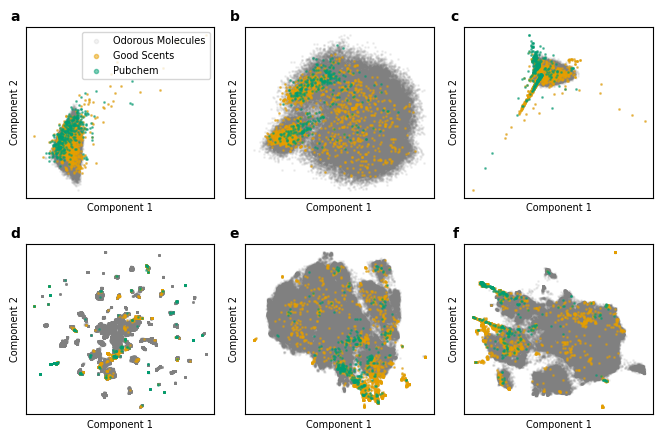

In [12]:
# Create 3x2 subplot using the plot_strength function
fig, axes = plt.subplots(2, 3, figsize=(FIGURE_WIDTH_LONG, FIGURE_WIDTH_LONG * 2/3))
# Define the plot configurations: (data_tuple, title, row, col)
plot_configs = [
    # Row 0: RDKit Descriptors
    ((x_pca_all_rdkit, x_pca_gs_rdkit, x_pca_pubchem_rdkit), explained_var_rdkit, 'RDKit Descriptors - PCA', 0, 0),
    ((x_umap_all_rdkit, x_umap_gs_rdkit, x_umap_pubchem_rdkit), None,'RDKit Descriptors - UMAP', 1, 0),
    
    # Row 1: Morgan Fingerprints (Binary)
    ((x_pca_all_morgan_bin, x_pca_gs_morgan_bin, x_pca_pubchem_morgan_bin), explained_var_morgan_bin, 'Morgan FP (Binary) - PCA', 0, 1),
    ((x_umap_all_morgan_bin, x_umap_gs_morgan_bin, x_umap_pubchem_morgan_bin), None, 'Morgan FP (Binary) - UMAP', 1, 1),
    
    # Row 2: Morgan Fingerprints (Count)
    ((x_pca_all_morgan_count, x_pca_gs_morgan_count, x_pca_pubchem_morgan_count), explained_var_morgan_count, 'Morgan FP (Count) - PCA', 0, 2),
    ((x_umap_all_morgan_count, x_umap_gs_morgan_count, x_umap_pubchem_morgan_count), None, 'Morgan FP (Count) - UMAP', 1, 2)
]

# Define subplot labels
subplot_labels = ['a', 'd', 'b', 'e', 'c', 'f']

# Create each subplot
for idx, (data_tuple, explained_var, title, row, col) in enumerate(plot_configs):
    ax = axes[row, col]
    
    # Set the current subplot as active
    plt.sca(ax)
    
    # Extract data
    x_all, x_gs, x_pubchem = data_tuple
    
    # Create the plot using the existing plot_strength function logic
    ax.scatter(x_all[:, 0], x_all[:, 1], s=S_DOT_GREY, label='Odorous Molecules', c='grey', alpha=0.1)
    ax.scatter(x_gs[:, 0], x_gs[:, 1], s=S_DOT_COLOR, label='Good Scents', c=okabe_ito[1], alpha=0.5)
    ax.scatter(x_pubchem[:, 0], x_pubchem[:, 1], s=S_DOT_COLOR, label='Pubchem', c=okabe_ito[3], alpha=0.5)

    
    # ax.set_title(title, fontsize=FONTSIZE, pad=LABELPAD)
    print(title)
    
    # Add subplot label in the top right corner
    ax.text(-0.03, 1.1, f'{subplot_labels[idx]}', transform=ax.transAxes, 
            fontsize=FONTSIZE+2, fontweight='bold', ha='right', va='top')
    
    # if explained_var is None:
    x_title = 'Component 1'
    y_title = 'Component 2'
    # else:
    #     x_title = f'PC1 ({explained_var[0]:.1%})'
    #     y_title = f'PC2 ({explained_var[1]:.1%})'
    ax.set_xlabel(x_title, fontsize=LABELSIZE, labelpad=LABELPAD)
    ax.set_ylabel(y_title, fontsize=LABELSIZE, labelpad=LABELPAD)
    ax.tick_params(axis='both', labelleft=False, labelbottom=False, length=0)
    
    # Add legend only to the first subplot
    if row == 0 and col == 0:
        ax.legend(fontsize=LABELSIZE, loc='upper right', markerscale=3)

plt.tight_layout()
plt.savefig('figures/pca_umap_gs_pubchem_w_background.pdf', dpi=DPI)
plt.show()

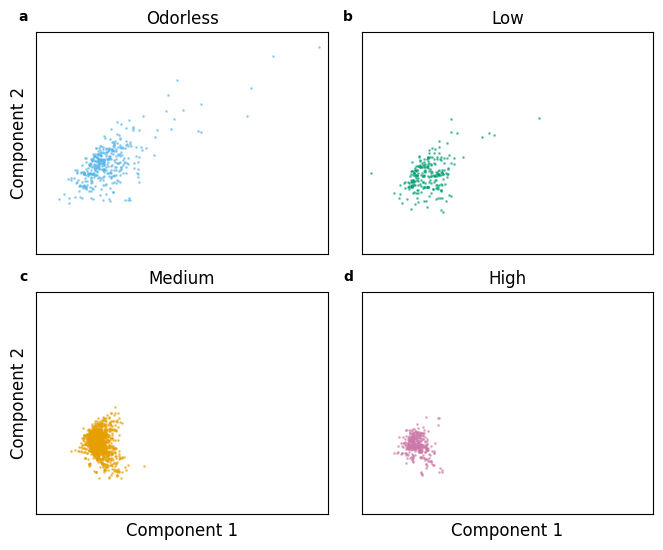

In [13]:
# Create separate plots for each numerical strength category using RDKit Descriptors PCA
fig, axes = plt.subplots(2, 2, figsize=(FIGURE_WIDTH_LONG, FIGURE_WIDTH_LONG / 1.2))

# Define colors for the 4 categories using okabe_ito palette
strength_categories = [0, 1, 2, 3]
category_labels = ['Odorless', 'Low', 'Medium', 'High']

# Define subplot labels for 2x2 grid
subplot_labels_2x2 = ['a', 'b', 'c', 'd']

# Get explained variance ratios for axis labels
var_ratio = explained_var_rdkit

for idx, strength_data in enumerate([x_pca_0_rdkit, x_pca_1_rdkit, x_pca_2_rdkit, x_pca_3_rdkit]):
    # Plot data points for this strength category
    row = idx // 2
    col = idx % 2
    ax = axes[row, col]
    ax.scatter(strength_data[:, 0], strength_data[:, 1], 
              c=colors[idx], 
              alpha=0.5, 
              s=1,
              )
    
    # Set title with category name and sample count
    ax.set_title(f'{category_labels[idx]}', fontsize=FONTSIZE, pad=LABELPAD)
    # print(title)
    
    # Add subplot label in the top right corner
    ax.text(-0.03, 1.1, f'{subplot_labels_2x2[idx]}', transform=ax.transAxes, 
            fontsize=FONTSIZE+2, fontweight='bold', ha='right', va='top')
    
    # Add explained variance to axis labels
    if row == 1:
        ax.set_xlabel(f'Component 1', fontsize=LABELSIZE, labelpad=LABELPAD)
    if col == 0:  # Only add y-label to the left column subplots
        ax.set_ylabel(f'Component 2', fontsize=LABELSIZE, labelpad=LABELPAD)
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.tick_params(axis='both', which='both', length=0)
    
    # Set consistent axis limits across all subplots
    ax.set_xlim(x_pca_all_rdkit[:, 0].min() - 5, x_pca_all_rdkit[:, 0].max() + 5)
    ax.set_ylim(x_pca_all_rdkit[:, 1].min() - 5, x_pca_all_rdkit[:, 1].max() + 5)

plt.tight_layout()
plt.savefig('figures/pca_rdkit_desc_per_odor_strength_w_background.pdf', dpi=DPI)
factor = 1.5
for idx, strength_data in enumerate([x_pca_0_rdkit, x_pca_1_rdkit, x_pca_2_rdkit, x_pca_3_rdkit]):
    # Plot data points for this strength category
    row = idx // 2
    col = idx % 2
    if row == 1:
        axes[row, col].set_xlabel('Component 1', fontsize=factor*FONTSIZE, labelpad=factor*LABELPAD)
    axes[row, col].set_title(f'{category_labels[idx]}', fontsize=factor*FONTSIZE)
    if col == 0:
        axes[row, col].set_ylabel('Component 2', fontsize=factor*FONTSIZE, labelpad=factor*LABELPAD)
plt.tight_layout()
plt.savefig('figures/pca_rdkit_desc_per_odor_strength_w_background.png', dpi=DPI)
plt.show()

In [14]:
# Analyze which RDKit descriptors have highest impact on PC1 and PC2
import numpy as np

# Get the feature names from RDKit descriptors
feature_names = rdkit_descriptors.columns.tolist()
def pca_component_analysis(pca, feature_names):
    print(f"Total number of RDKit descriptors: {len(feature_names)}")

    # Get the components (loadings) for PC1 and PC2
    pc1_loadings = pca.components_[0]
    pc2_loadings = pca.components_[1]

    # Get the absolute values to find strongest impact regardless of direction
    pc1_abs_loadings = np.abs(pc1_loadings)
    pc2_abs_loadings = np.abs(pc2_loadings)

    # Find top 10 features for PC1
    pc1_top_indices = np.argsort(pc1_abs_loadings)[-15:][::-1]
    pc1_top_features = pd.DataFrame([(feature_names[i], pc1_loadings[i]) for i in pc1_top_indices], columns=['Feature PC1', 'PC1 Loading'])

    # Find top 10 features for PC2
    pc2_top_indices = np.argsort(pc2_abs_loadings)[-15:][::-1]
    pc2_top_features = pd.DataFrame([(feature_names[i], pc2_loadings[i]) for i in pc2_top_indices], columns=['Feature PC2', 'PC2 Loading'])

    return pc1_top_features, pc2_top_features

pc1_top_features, pc2_top_features = pca_component_analysis(pca_rdkit_desc, feature_names)
print(pd.concat([pc1_top_features, pc2_top_features], axis=1).to_latex(index=False))

Total number of RDKit descriptors: 217
\begin{tabular}{lrlr}
\toprule
Feature PC1 & PC1 Loading & Feature PC2 & PC2 Loading \\
\midrule
HeavyAtomMolWt & 0.162104 & MolLogP & 0.184090 \\
ExactMolWt & 0.162090 & VSA_EState7 & 0.179914 \\
MolWt & 0.162061 & SlogP_VSA5 & 0.173863 \\
NumValenceElectrons & 0.161716 & TPSA & -0.152584 \\
Chi0 & 0.160954 & VSA_EState8 & 0.152035 \\
HeavyAtomCount & 0.160812 & NumHeteroatoms & -0.150515 \\
Chi1 & 0.159409 & NOCount & -0.145843 \\
LabuteASA & 0.158483 & SMR_VSA5 & 0.137586 \\
Chi0v & 0.153552 & NHOHCount & -0.133345 \\
Chi0n & 0.153145 & PEOE_VSA7 & 0.133058 \\
Kappa1 & 0.151412 & EState_VSA5 & 0.131315 \\
Chi1v & 0.151135 & NumHDonors & -0.130139 \\
Chi1n & 0.150262 & PEOE_VSA6 & 0.130132 \\
MolMR & 0.147677 & EState_VSA8 & 0.129424 \\
Chi2v & 0.146024 & NumHAcceptors & -0.129146 \\
\bottomrule
\end{tabular}



In [15]:
pc1_top_features, pc2_top_features = pca_component_analysis(pca_rdkit, feature_names)
print(pd.concat([pc1_top_features, pc2_top_features], axis=1).to_latex(index=False))

Total number of RDKit descriptors: 217
\begin{tabular}{lrlr}
\toprule
Feature PC1 & PC1 Loading & Feature PC2 & PC2 Loading \\
\midrule
Chi1v & 0.170900 & NumHeteroatoms & 0.173622 \\
Chi1n & 0.170844 & NOCount & 0.166007 \\
Chi2v & 0.169255 & MinAbsPartialCharge & 0.164090 \\
Chi2n & 0.168528 & MaxPartialCharge & 0.163948 \\
NumValenceElectrons & 0.168341 & HallKierAlpha & -0.163185 \\
HeavyAtomCount & 0.167844 & TPSA & 0.159375 \\
Chi1 & 0.166394 & SMR_VSA10 & 0.151925 \\
LabuteASA & 0.166337 & NumHAcceptors & 0.147437 \\
Chi0n & 0.163871 & SPS & -0.144280 \\
Chi0v & 0.163191 & NumAliphaticRings & -0.136433 \\
ExactMolWt & 0.162538 & NumSaturatedRings & -0.135090 \\
MolWt & 0.162495 & NumAliphaticCarbocycles & -0.129865 \\
Chi3v & 0.161745 & MaxEStateIndex & 0.128348 \\
Chi3n & 0.159376 & MaxAbsEStateIndex & 0.128348 \\
HeavyAtomMolWt & 0.159341 & NumSaturatedCarbocycles & -0.123744 \\
\bottomrule
\end{tabular}



PC1 as molecular size and shape measure and PC2 as polarity measure

/tmp/ipykernel_1422800/1655738391.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


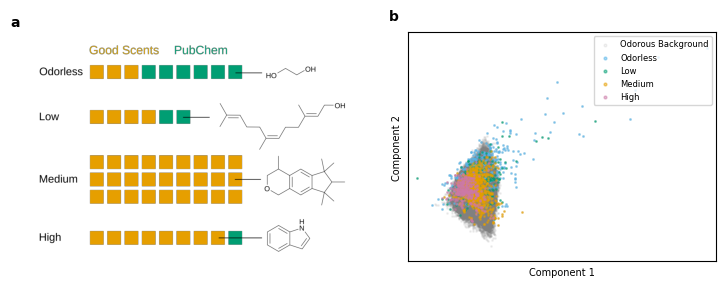

In [16]:
# Create a 1x2 plot combining the separated plots and dataset figure
import matplotlib.image as mpimg
from matplotlib.patches import Rectangle
import cairosvg
from io import BytesIO
import numpy as np
from PIL import Image

fig, axes = plt.subplots(1, 2, figsize=(FIGURE_WIDTH_LONG*1.3, FIGURE_WIDTH_LONG / 1.47 * 0.65), 
                         gridspec_kw={'wspace': 0.2})

# Define subplot labels for 1x2 grid
subplot_labels_2x2 = ['a', 'b']

# Define colors for the 4 categories using okabe_ito palette
strength_categories = [0, 1, 2, 3]
category_labels = ['Odorless', 'Low', 'Medium', 'High']

# Left: Load and display dataset figure
ax1 = axes[0]
# Try to load SVG first, then fall back to raster formats
svg_path = 'figures/dataset_overview.svg'
# Convert SVG to PNG in memory at 600 DPI, preserving original size
png_data = cairosvg.svg2png(url=svg_path, dpi=700)
image = Image.open(BytesIO(png_data))
dataset_img = np.array(image)

# Display image with original aspect ratio
ax1.imshow(dataset_img, aspect='equal')
ax1.axis('off')  # Hide axes for the image

# Set the subplot limits to match the image dimensions
height, width = dataset_img.shape[:2]
ax1.set_xlim(0, width)
ax1.set_ylim(height, 0)  # Flip y-axis for image coordinate system

# Add subplot label
ax1.text(-0.06, 1.1, f'{subplot_labels_2x2[0]}', transform=ax1.transAxes, 
         fontsize=FONTSIZE+2, fontweight='bold', ha='right', va='top')

# Right: PCA plot with background
ax2 = axes[1]
ax2.scatter(x_pca_all_rdkit[:, 0], x_pca_all_rdkit[:, 1], s=S_DOT_GREY, label='Odorous Background', c='grey', alpha=0.1)
ax2.scatter(x_pca_0_rdkit[:, 0], x_pca_0_rdkit[:, 1], s=S_DOT_COLOR, label='Odorless', c=colors[0], alpha=0.5)
ax2.scatter(x_pca_1_rdkit[:, 0], x_pca_1_rdkit[:, 1], s=S_DOT_COLOR, label='Low', c=colors[1], alpha=0.5)
ax2.scatter(x_pca_2_rdkit[:, 0], x_pca_2_rdkit[:, 1], s=S_DOT_COLOR, label='Medium', c=colors[2], alpha=0.5)
ax2.scatter(x_pca_3_rdkit[:, 0], x_pca_3_rdkit[:, 1], s=S_DOT_COLOR, label='High', c=colors[3], alpha=0.5)

ax2.set_xlabel(f'Component 1', fontsize=LABELSIZE, labelpad=LABELPAD)
ax2.set_ylabel(f'Component 2', fontsize=LABELSIZE, labelpad=LABELPAD)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.tick_params(axis='both', which='both', length=0)
ax2.set_xlim(x_pca_all_rdkit[:, 0].min() - 5, x_pca_all_rdkit[:, 0].max() + 5)
ax2.set_ylim(x_pca_all_rdkit[:, 1].min() - 5, x_pca_all_rdkit[:, 1].max() + 5)
ax2.legend(fontsize=LABELSIZE-1, loc='upper right', markerscale=2)

# Add subplot label
ax2.text(-0.03, 1.1, f'{subplot_labels_2x2[1]}', transform=ax2.transAxes, 
         fontsize=FONTSIZE+2, fontweight='bold', ha='right', va='top')


plt.tight_layout()
plt.savefig('figures/analysis_main.pdf', dpi=DPI, bbox_inches='tight', pad_inches=0)
plt.savefig('figures/analysis_main.svg', bbox_inches='tight', pad_inches=0)

plt.show()

## Clustering

In [17]:
# Clustering analysis on high-dimensional descriptors
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, silhouette_score
import warnings
warnings.filterwarnings('ignore')

In [18]:

# Prepare the data
descriptors = {
    'Morgan Binary': morgan_fingerprints,
    'Morgan Count': morgan_fingerprints_count,
    'RDKit Descriptors': rdkit_descriptors.values  # Use the original non-standardized values for clustering
}

# True labels for ARI calculation
true_labels = df['numerical_strength'].values

# Define hyperparameter grids for each algorithm
hyperparameter_grids = {
    'K-Means': {
        'init': ['k-means++', 'random'],
        'max_iter': [100, 300, 500],
        'tol': [1e-4, 1e-3, 1e-2]
    },
    'GMM': {
        'covariance_type': ['full', 'tied', 'diag', 'spherical'],
        'max_iter': [100, 200, 300],
        'tol': [1e-3, 1e-4, 1e-5]
    },
    'DBSCAN': {
        'Morgan Binary': {'eps': [0.05, 0.1, 0.2, 0.3, 0.4, 0.5], 'min_samples': [5]},
        'Morgan Count': {'eps': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0], 'min_samples': [5]},
        'RDKit Descriptors': {'eps': [0.5, 1.0, 1.5, 2.0, 2.5, 3.0], 'min_samples': [5]}
    },
    'Agglomerative': {
        'linkage': ['ward', 'complete', 'average', 'single'],
        'metric': ['euclidean', 'manhattan', 'cosine']
    }
}

def get_best_hyperparameters(desc_name, desc_data, alg_name, true_labels):
    """Find best hyperparameters for a given algorithm and descriptor combination."""
    best_score = -float('inf')
    best_params = None
    best_labels = None
    
    if alg_name == 'DBSCAN':
        # Use descriptor-specific eps values for DBSCAN
        param_grid = hyperparameter_grids['DBSCAN'][desc_name]
        for eps in param_grid['eps']:
            for min_samples in param_grid['min_samples']:
                try:
                    cluster_labels = DBSCAN(eps=eps, min_samples=min_samples).fit_predict(desc_data)
                    ari = adjusted_rand_score(true_labels, cluster_labels)
                    
                    # Only consider if we get meaningful clusters (not all noise)
                    if len(set(cluster_labels)) > 1 and not all(label == -1 for label in cluster_labels):
                        if ari > best_score:
                            best_score = ari
                            best_params = {'eps': eps, 'min_samples': min_samples}
                            best_labels = cluster_labels
                except:
                    continue
    
    elif alg_name == 'K-Means':
        param_grid = hyperparameter_grids['K-Means']
        for init in param_grid['init']:
            for max_iter in param_grid['max_iter']:
                for tol in param_grid['tol']:
                    try:
                        cluster_labels = KMeans(n_clusters=4, init=init, max_iter=max_iter, 
                                               tol=tol, random_state=42, n_init=10).fit_predict(desc_data)
                        ari = adjusted_rand_score(true_labels, cluster_labels)
                        
                        if ari > best_score:
                            best_score = ari
                            best_params = {'init': init, 'max_iter': max_iter, 'tol': tol}
                            best_labels = cluster_labels
                    except:
                        continue
    
    elif alg_name == 'GMM':
        param_grid = hyperparameter_grids['GMM']
        for cov_type in param_grid['covariance_type']:
            for max_iter in param_grid['max_iter']:
                for tol in param_grid['tol']:
                    try:
                        cluster_labels = GaussianMixture(n_components=4, covariance_type=cov_type,
                                                        max_iter=max_iter, tol=tol, 
                                                        random_state=42).fit_predict(desc_data)
                        ari = adjusted_rand_score(true_labels, cluster_labels)
                        
                        if ari > best_score:
                            best_score = ari
                            best_params = {'covariance_type': cov_type, 'max_iter': max_iter, 'tol': tol}
                            best_labels = cluster_labels
                    except:
                        continue
    
    elif alg_name == 'Agglomerative':
        param_grid = hyperparameter_grids['Agglomerative']
        for linkage in param_grid['linkage']:
            for metric in param_grid['metric']:
                # Ward linkage only works with euclidean metric
                if linkage == 'ward' and metric != 'euclidean':
                    continue
                try:
                    if linkage == 'ward':
                        cluster_labels = AgglomerativeClustering(n_clusters=4, linkage=linkage).fit_predict(desc_data)
                    else:
                        cluster_labels = AgglomerativeClustering(n_clusters=4, linkage=linkage, 
                                                                metric=metric).fit_predict(desc_data)
                    ari = adjusted_rand_score(true_labels, cluster_labels)
                    
                    if ari > best_score:
                        best_score = ari
                        best_params = {'linkage': linkage, 'metric': metric if linkage != 'ward' else 'euclidean'}
                        best_labels = cluster_labels
                except:
                    continue
    
    elif alg_name == 'Spectral':
        # Keep Spectral clustering with default parameters (no major hyperparameters to tune beyond n_clusters)
        try:
            cluster_labels = SpectralClustering(n_clusters=4, random_state=42, n_jobs=-1).fit_predict(desc_data)
            ari = adjusted_rand_score(true_labels, cluster_labels)
            best_score = ari
            best_params = {'default': True}
            best_labels = cluster_labels
        except:
            best_score = float('nan')
            best_params = None
            best_labels = None
    
    return best_score, best_params, best_labels

# Initialize results storage
results = []

# List of algorithms to test
algorithms = ['K-Means', 'GMM', 'DBSCAN', 'Spectral', 'Agglomerative']

print("Computing clustering results with hyperparameter tuning...")
print("="*80)

for desc_name, desc_data in descriptors.items():
    print(f"\nAnalyzing {desc_name}...")

    for alg_name in algorithms:
        print(f"  Running {alg_name} with hyperparameter tuning...", end=" ")
        
        try:
            # Get best hyperparameters and results
            best_ari, best_params, best_labels = get_best_hyperparameters(desc_name, desc_data, alg_name, true_labels)
            
            if best_labels is not None:
                # Calculate silhouette score for best result
                if len(set(best_labels)) > 1 and not all(label == -1 for label in best_labels):
                    # For DBSCAN, exclude noise points (-1) from silhouette calculation
                    if alg_name == 'DBSCAN':
                        mask = best_labels != -1
                        if mask.sum() > 1 and len(set(best_labels[mask])) > 1:
                            silhouette = silhouette_score(desc_data[mask], best_labels[mask])
                        else:
                            silhouette = float('nan')
                    else:
                        silhouette = silhouette_score(desc_data, best_labels)
                else:
                    silhouette = float('nan')
                
                # Count clusters (excluding noise for DBSCAN)
                unique_clusters = set(best_labels)
                if -1 in unique_clusters:  # DBSCAN noise
                    n_clusters = len(unique_clusters) - 1
                    noise_points = sum(1 for label in best_labels if label == -1)
                else:
                    n_clusters = len(unique_clusters)
                    noise_points = 0
                
                results.append({
                    'Descriptor': desc_name,
                    'Algorithm': alg_name,
                    'ARI': best_ari,
                    'Silhouette': silhouette,
                    'N_Clusters': n_clusters,
                    'Noise_Points': noise_points,
                    'Best_Params': str(best_params)
                })
                
                silh_display = f"{silhouette:.3f}" if not pd.isna(silhouette) else "N/A"
                print(f"✓ ARI: {best_ari:.3f}, Silhouette: {silh_display}")
                print(f"    Best params: {best_params}")
                
            else:
                results.append({
                    'Descriptor': desc_name,
                    'Algorithm': alg_name,
                    'ARI': float('nan'),
                    'Silhouette': float('nan'),
                    'N_Clusters': float('nan'),
                    'Noise_Points': float('nan'),
                    'Best_Params': 'Failed'
                })
                print("✗ Failed to find valid clustering")
            
        except Exception as e:
            print(f"✗ Error: {str(e)[:50]}...")
            results.append({
                'Descriptor': desc_name,
                'Algorithm': alg_name,
                'ARI': float('nan'),
                'Silhouette': float('nan'),
                'N_Clusters': float('nan'),
                'Noise_Points': float('nan'),
                'Best_Params': f'Error: {str(e)[:30]}'
            })

# Convert results to DataFrame for better presentation
results_df = pd.DataFrame(results)

print("\nNotes:")
print("- ARI (Adjusted Rand Index): Measures similarity to true labels (higher is better, max=1.0)")
print("- Silhouette Score: Measures cluster quality (higher is better, range [-1,1])")
print("- Noise points only apply to DBSCAN algorithm")
print("- Best parameters show the hyperparameter combination that achieved the highest ARI score")

Computing clustering results with hyperparameter tuning...

Analyzing Morgan Binary...
  Running K-Means with hyperparameter tuning... ✓ ARI: 0.021, Silhouette: 0.012
    Best params: {'init': 'k-means++', 'max_iter': 100, 'tol': 0.0001}
  Running GMM with hyperparameter tuning... ✓ ARI: 0.066, Silhouette: -0.049
    Best params: {'covariance_type': 'spherical', 'max_iter': 100, 'tol': 0.001}
  Running DBSCAN with hyperparameter tuning... ✓ ARI: 0.011, Silhouette: 1.000
    Best params: {'eps': 0.05, 'min_samples': 5}
  Running Spectral with hyperparameter tuning... ✓ ARI: 0.002, Silhouette: 0.304
    Best params: {'default': True}
  Running Agglomerative with hyperparameter tuning... ✓ ARI: 0.018, Silhouette: -0.114
    Best params: {'linkage': 'complete', 'metric': 'cosine'}

Analyzing Morgan Count...
  Running K-Means with hyperparameter tuning... ✓ ARI: 0.032, Silhouette: 0.137
    Best params: {'init': 'k-means++', 'max_iter': 100, 'tol': 0.0001}
  Running GMM with hyperparameter 

In [19]:
results_df

,Descriptor,Algorithm,ARI,Silhouette,N_Clusters,Noise_Points,Best_Params
0,Morgan Binary,K-Means,0.021199,0.011716,4,0,"{'init': 'k-means++', 'max_iter': 100, 'tol': ..."
1,Morgan Binary,GMM,0.066216,-0.048852,4,0,"{'covariance_type': 'spherical', 'max_iter': 1..."
2,Morgan Binary,DBSCAN,0.011091,1.000000,6,2016,"{'eps': 0.05, 'min_samples': 5}"
3,Morgan Binary,Spectral,0.001670,0.304132,4,0,{'default': True}
4,Morgan Binary,Agglomerative,0.017717,-0.113949,4,0,"{'linkage': 'complete', 'metric': 'cosine'}"
5,Morgan Count,K-Means,0.032182,0.136893,4,0,"{'init': 'k-means++', 'max_iter': 100, 'tol': ..."
6,Morgan Count,GMM,0.051157,0.110154,4,0,"{'covariance_type': 'spherical', 'max_iter': 1..."
7,Morgan Count,DBSCAN,0.042415,0.201092,18,1759,"{'eps': 4.0, 'min_samples': 5}"
8,Morgan Count,Spectral,0.001473,0.605406,3,0,{'default': True}
9,Morgan Count,Agglomerative,0.058616,0.148238,4,0,"{'linkage': 'ward', 'metric': 'euclidean'}"


In [20]:
print(results_df.to_latex(index=False, columns=['Descriptor', 'Algorithm', 'ARI', 'Silhouette'], float_format="%.3f"))

\begin{tabular}{llrr}
\toprule
Descriptor & Algorithm & ARI & Silhouette \\
\midrule
Morgan Binary & K-Means & 0.021 & 0.012 \\
Morgan Binary & GMM & 0.066 & -0.049 \\
Morgan Binary & DBSCAN & 0.011 & 1.000 \\
Morgan Binary & Spectral & 0.002 & 0.304 \\
Morgan Binary & Agglomerative & 0.018 & -0.114 \\
Morgan Count & K-Means & 0.032 & 0.137 \\
Morgan Count & GMM & 0.051 & 0.110 \\
Morgan Count & DBSCAN & 0.042 & 0.201 \\
Morgan Count & Spectral & 0.001 & 0.605 \\
Morgan Count & Agglomerative & 0.059 & 0.148 \\
RDKit Descriptors & K-Means & 0.071 & 0.075 \\
RDKit Descriptors & GMM & 0.162 & 0.062 \\
RDKit Descriptors & DBSCAN & -0.001 & 0.626 \\
RDKit Descriptors & Spectral & 0.001 & 0.506 \\
RDKit Descriptors & Agglomerative & 0.029 & 0.047 \\
\bottomrule
\end{tabular}



### Dataset figure

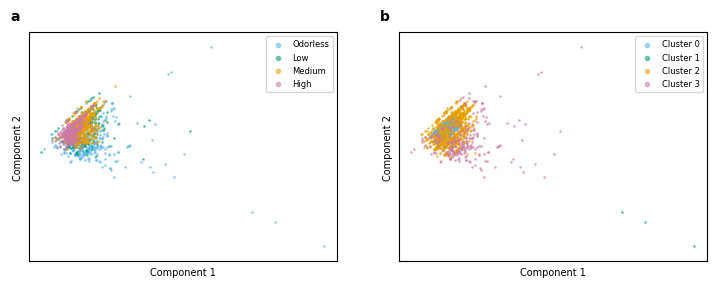

Bbox(x0=0.125, y0=0.10999999999999999, x1=0.9, y1=0.88)

GMM Clustering Performance:
Adjusted Rand Index (ARI): 0.162
Best hyperparameters: covariance_type='spherical', max_iter=100, tol=0.001


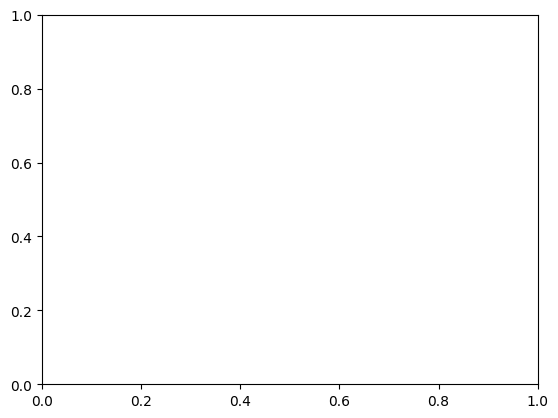

In [21]:
# Create a 1x2 plot combining the separated plots and dataset figure
import matplotlib.image as mpimg
from matplotlib.patches import Rectangle
import cairosvg
from io import BytesIO
import numpy as np
from PIL import Image

fig, axes = plt.subplots(1, 2, figsize=(FIGURE_WIDTH_LONG*1.3, FIGURE_WIDTH_LONG / 1.47 * 0.65), 
                         gridspec_kw={'wspace': 0.2})

# Define subplot labels for 1x2 grid
subplot_labels = ['a', 'b']

# Define colors for the 4 categories using okabe_ito palette
strength_categories = [0, 1, 2, 3]
category_labels = ['Odorless', 'Low', 'Medium', 'High']

# Left: PCA colored by true labels
ax1 = axes[0]
for cat_idx, strength in enumerate(strength_categories):
    mask = df['numerical_strength'] == strength
    ax1.scatter(rdkit_pca[mask, 0], rdkit_pca[mask, 1], 
              c=colors[cat_idx], 
              label=category_labels[cat_idx],
              alpha=0.5, 
              s=1)

ax1.set_xlabel(f'Component 1', fontsize=LABELSIZE, labelpad=LABELPAD)
ax1.set_ylabel(f'Component 2', fontsize=LABELSIZE, labelpad=LABELPAD)
ax1.tick_params(labelbottom=False, labelleft=False, length=0)
ax1.legend(fontsize=LABELSIZE-1, loc='upper right', markerscale=3)

# Set axis limits to match the background plot
x_min, x_max = rdkit_pca[:, 0].min() - 5, rdkit_pca[:, 0].max() + 5
y_min, y_max = rdkit_pca[:, 1].min() - 5, rdkit_pca[:, 1].max() + 5
ax1.set_xlim(x_min, x_max)
ax1.set_ylim(y_min, y_max)

# Add subplot label
ax1.text(-0.03, 1.1, f'{subplot_labels[0]}', transform=ax1.transAxes, 
         fontsize=FONTSIZE+2, fontweight='bold', ha='right', va='top')

# Right: PCA colored by GMM clusters
# First perform GMM clustering
best_gmm = GaussianMixture(n_components=4, covariance_type='spherical', 
                          max_iter=100, tol=0.001, random_state=42)
gmm_cluster_labels = best_gmm.fit_predict(rdkit_descriptors.values)

ax2 = axes[1]
cluster_labels_unique = sorted(set(gmm_cluster_labels))

for cluster_idx in cluster_labels_unique:
    mask = gmm_cluster_labels == cluster_idx
    ax2.scatter(rdkit_pca[mask, 0], rdkit_pca[mask, 1], 
              c=colors[cluster_idx], 
              label=f'Cluster {cluster_idx}',
              alpha=0.5, 
              s=1)

ax2.set_xlabel(f'Component 1', fontsize=LABELSIZE, labelpad=LABELPAD)
ax2.set_ylabel(f'Component 2', fontsize=LABELSIZE, labelpad=LABELPAD)
ax2.tick_params(labelbottom=False, labelleft=False, length=0)
ax2.legend(fontsize=LABELSIZE-1, loc='upper right', markerscale=3)
ax2.set_xlim(x_min, x_max)
ax2.set_ylim(y_min, y_max)

# Add subplot label
ax2.text(-0.03, 1.1, f'{subplot_labels[1]}', transform=ax2.transAxes, 
         fontsize=FONTSIZE+2, fontweight='bold', ha='right', va='top')

# Adjust layout manually instead of tight_layout to avoid spacing issues
# plt.subplots_adjust(left=0.1, right=0.95, top=0.95, bottom=0.1, hspace=0.3, wspace=0.3)
plt.tight_layout()
plt.savefig('figures/clustering.pdf', dpi=DPI, bbox_inches='tight', pad_inches=0)
plt.savefig('figures/clustering.svg', bbox_inches='tight', pad_inches=0)

plt.show()

ax = plt.gca()
print(ax.get_position())

# Calculate and display the ARI between true labels and GMM clustering
gmm_ari = adjusted_rand_score(df['numerical_strength'].values, gmm_cluster_labels)
print(f"\nGMM Clustering Performance:")
print(f"Adjusted Rand Index (ARI): {gmm_ari:.3f}")
print(f"Best hyperparameters: covariance_type='spherical', max_iter=100, tol=0.001")